## Descriptive datasets for Section3/breast_MR_NME_biological

In [2]:
# to save graphs
import sys
import os
import six.moves.cPickle as pickle
import gzip
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 36})

import seaborn as sns# start by loading nxGdatafeatures
NME_nxgraphs = r'Z:\Cristina\Section3\paper_notes_section3_MODIFIED\\breast_MR_NME_biological\NMEs_SER_nxgmetrics'

# to load nxGdatafeatures df for all lesions
with gzip.open(os.path.join(NME_nxgraphs,'nxGdatafeatures_allNMEs_10binsize.pklz'), 'rb') as fin:
    nxGdatafeatures = pickle.load(fin)

    
# gather other infor such as patient levels
sys.path.insert(0,'Z:\\Cristina\Section3\\breast_MR_NME_biological')
from query_localdatabase import *
from sqlalchemy.orm import sessionmaker, joinedload_all
from sqlalchemy import create_engine
querydb = Querylocaldb()
# configure Session class with desired options
Session = sessionmaker()
queryengine = create_engine('sqlite:///Z:\\Cristina\\Section3\\paper_notes_section3_MODIFIED\\breast_MR_NME_biological\\nonmass_roibiological.db', echo=False) # now on, when adding new cases # for filled by Z:\\Cristina\\Section3\\NME_DEC\\imgFeatures\\NME_forBIRADSdesc\\nonmass_roirecords.db
Session.configure(bind=queryengine)  # once engine is available
session = Session() #instantiate a Session

list_lesion_ids = nxGdatafeatures['lesion_id'].values
pt_info = pd.DataFrame()
roi_info = pd.DataFrame()
for lesion_id in list_lesion_ids:
    # perform query
    ############# by lesion id
    lesion = session.query(localdatabase.Lesion_record, localdatabase.Radiology_record, localdatabase.ROI_record).\
        filter(localdatabase.Radiology_record.lesion_id==localdatabase.Lesion_record.lesion_id).\
        filter(localdatabase.ROI_record.lesion_id==localdatabase.Lesion_record.lesion_id).\
        filter(localdatabase.Lesion_record.lesion_id == str(lesion_id)).options(joinedload_all('*')).all()
    # print results
    if not lesion:
        print "lesion is empty"
        lesion_id = lesion_id+1
        continue
    
    lesion = lesion[0]    
    # lesion frame       
    casesFrame = pd.Series(lesion.Lesion_record.__dict__)
    pt_info = pt_info.append(casesFrame, ignore_index=True)   
    roiFrame = pd.Series(lesion.ROI_record.__dict__)
    roi_info = roi_info.append(roiFrame, ignore_index=True)  


print '\n==================== cad_pt_no_txt: ===================='
cad_pt_no = pd.Series(pt_info['cad_pt_no_txt'])
cad_pt_all = cad_pt_no.unique()
total_patients = len(cad_pt_all)
print 'Number of patients (n=%d) \n' % (total_patients)

print '\n==================== anony_dob_datetime: ===================='
df = pd.DataFrame([])
df['dob_datetimes'] = pt_info['anony_dob_datetime']
df['exam_datetimes'] = pt_info['exam_dt_datetime']
df['Ageatimaging'] = df['exam_datetimes']-df['dob_datetimes']
df['AgeYear']= df['Ageatimaging'].astype('timedelta64[D]').apply(lambda x: float(x.item())/365.0)
print df['AgeYear'].describe()




==================== cad_pt_no_txt: ====================
Number of patients (n=411) 


==================== anony_dob_datetime: ====================
count    792.000000
mean      46.732597
std       10.991623
min       -0.246575
25%       39.322603
50%       45.249315
75%       52.985616
max       83.057534
Name: AgeYear, dtype: float64


In [3]:
print roi_info.keys()
print '\n==================== Overall roi_labels in unified nonmass_roibiological.db: ===================='
s = pd.Series(roi_info['roi_label'], dtype="str")
cat_levels = s.unique()
total = len(s)
for k in range(len(cat_levels)):
    totalcat = np.sum(s == cat_levels[k])
    print '%s (n=%d) (%d/%d = %f percent) \n' % (cat_levels[k], totalcat, totalcat, total, totalcat/float(total) )


Index([            u'FU1ycondition',                   u'FU1year',
                   u'FU2ycondition',                   u'FU2year',
                   u'FU6mcondition',                 u'FU6months',
              u'_sa_instance_state',             u'a_number_FU1y',
                   u'a_number_FU2y',             u'a_number_FU6m',
                   u'datetime_FU1y',             u'datetime_FU2y',
                   u'datetime_FU6m',        u'eval_as_folup_FU1y',
              u'eval_as_folup_FU2y',        u'eval_as_folup_FU6m',
               u'high_risk_at_FU1y',         u'high_risk_at_FU2y',
               u'high_risk_at_FU6m',                 u'lesion_id',
        u'original_report_txt_FU1y',  u'original_report_txt_FU2y',
        u'original_report_txt_FU6m',               u'patch_diag1',
                     u'patch_diag2', u'previous_exam_reason_FU1y',
       u'previous_exam_reason_FU2y', u'previous_exam_reason_FU6m',
         u'previous_exam_when_FU1y',   u'previous_exam_when_FU

In [4]:
## before diving into features summarize labels
print '\n==================== Lesion label:===================='
s = pd.Series(nxGdatafeatures['classNME'], dtype="str")
cat_levels = s.unique()
total = len(s)
for k in range(len(cat_levels)):
    totalcat = np.sum(s == cat_levels[k])
    print '%s (n=%d) (%d/%d = %f percent) \n' % (cat_levels[k], totalcat, totalcat, total, totalcat/float(total) )

print '\n==================== Lesion diagnosis: ===================='
s = pd.Series(nxGdatafeatures['roi_diagnosis'], dtype="str")
cat_levels = s.unique()
total = len(s)
for k in range(len(cat_levels)):
    totalcat = np.sum(s == cat_levels[k])
    print '%s (n=%d) (%d/%d = %f percent) \n' % (cat_levels[k], totalcat, totalcat, total, totalcat/float(total) )

print '\n==================== Lesion BIRADS: ===================='
s = pd.Series(nxGdatafeatures['roiBIRADS'], dtype="str")
cat_levels = s.unique()
total = len(s)
for k in range(len(cat_levels)):
    totalcat = np.sum(s == cat_levels[k])
    print '%s (n=%d) (%d/%d = %f percent) \n' % (cat_levels[k], totalcat, totalcat, total, totalcat/float(total) )


print '\n==================== DCE initial enhancement: ===================='
s = pd.Series(nxGdatafeatures['dce_init'], dtype="str")
cat_levels = s.unique()
total = len(s)
for k in range(len(cat_levels)):
    totalcat = np.sum(s == cat_levels[k])
    print '%s (n=%d) (%d/%d = %f percent) \n' % (cat_levels[k], totalcat, totalcat, total, totalcat/float(total) )


print '\n==================== DCE delay enhancement: ===================='
s = pd.Series(nxGdatafeatures['dce_delay'], dtype="str")
cat_levels = s.unique()
total = len(s)
for k in range(len(cat_levels)):
    totalcat = np.sum(s == cat_levels[k])
    print '%s (n=%d) (%d/%d = %f percent) \n' % (cat_levels[k], totalcat, totalcat, total, totalcat/float(total) )

print '\n==================== NME distribution pattern: ===================='
s = pd.Series(nxGdatafeatures['nme_dist'], dtype="str")
cat_levels = s.unique()
total = len(s)
for k in range(len(cat_levels)):
    totalcat = np.sum(s == cat_levels[k])
    print '%s (n=%d) (%d/%d = %f percent) \n' % (cat_levels[k], totalcat, totalcat, total, totalcat/float(total) )


print '\n==================== NME internal enahcement pattern: ===================='
s = pd.Series(nxGdatafeatures['nme_int'], dtype="str")
cat_levels = s.unique()
total = len(s)
for k in range(len(cat_levels)):
    totalcat = np.sum(s == cat_levels[k]) 
    print '%s (n=%d) (%d/%d = %f percent) \n' % (cat_levels[k], totalcat, totalcat, total, totalcat/float(total) )    



==================== Lesion label:====================
M (n=110) (110/792 = 0.138889 percent) 

B (n=267) (267/792 = 0.337121 percent) 

U (n=415) (415/792 = 0.523990 percent) 


==================== Lesion diagnosis: ====================
InsituDuctal (n=35) (35/792 = 0.044192 percent) 

DENSE FIBROSIS (n=6) (6/792 = 0.007576 percent) 

STROMAL FIBROSIS (n=8) (8/792 = 0.010101 percent) 

InvasiveDuctal (n=23) (23/792 = 0.029040 percent) 

DUCT PAPILLOMA (n=7) (7/792 = 0.008838 percent) 

COLUMNAR CELL CHANGES (n=13) (13/792 = 0.016414 percent) 

BENIGN BREAST TISSUE (n=39) (39/792 = 0.049242 percent) 

FIBROCYSTIC (n=26) (26/792 = 0.032828 percent) 

FIBROADENOMA (n=10) (10/792 = 0.012626 percent) 

SCLEROSING ADENOSIS (n=2) (2/792 = 0.002525 percent) 

ColumnarAlterationwoAtypia (n=2) (2/792 = 0.002525 percent) 

LobularHyperplasia (n=2) (2/792 = 0.002525 percent) 

ATYPICAL DUCTAL HYPERPLASIA (n=22) (22/792 = 0.027778 percent) 

COMPLEX PAPILLARY LESION (n=2) (2/792 = 0.002525 perce

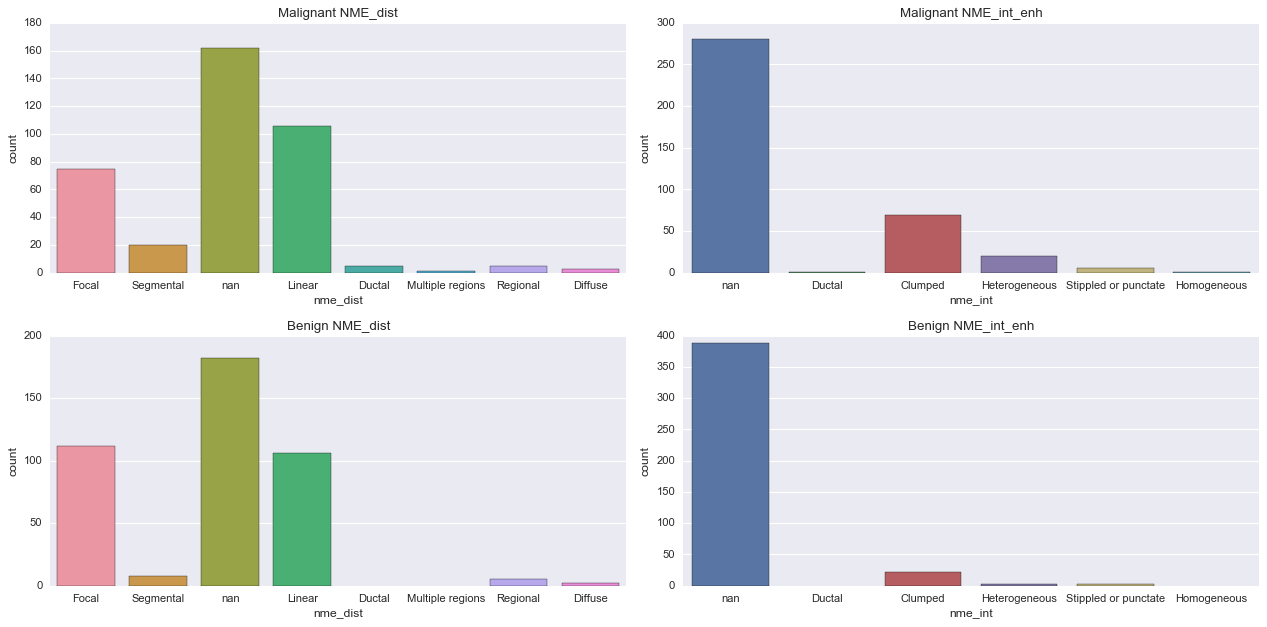

In [4]:
NME_dist = pd.Series(nxGdatafeatures['nme_dist'], dtype="str")
NME_int_enh = pd.Series(nxGdatafeatures['nme_int'], dtype="str")
label = nxGdatafeatures['classNME'].values
ind = label!='U'
label = label[ind]

# first plot by label
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(221)
ax = sns.countplot(x=NME_dist[ind], order=NME_dist.unique()) # normdiscrallDEL_degree_histogram
ax.set_title('Malignant NME_dist')
ax = fig.add_subplot(222)
ax = sns.countplot(x=NME_int_enh[ind], order=NME_int_enh.unique()) # normdiscrallDEL_degree_histogram
ax.set_title('Malignant NME_int_enh')

ax = fig.add_subplot(223)
ax = sns.countplot(x=NME_dist[~ind], order=NME_dist.unique())
ax.set_title('Benign NME_dist')
ax = fig.add_subplot(224)
ax = sns.countplot(x=NME_int_enh[~ind], order=NME_int_enh.unique())  # normdiscrallDEL_degree_histogram
ax.set_title('Benign NME_int_enh')

fig.set_size_inches(16, 8)
fig.tight_layout()

'''
##################################################################
## Statistics from two databases of patient collection
################################################################## 
'''  

In [15]:
cad_pt_no = pd.Series(pt_info['cad_pt_no_txt'])
cad_accesion_no = pd.Series(pt_info['exam_a_number_txt'])
ids = pd.concat((cad_pt_no,cad_accesion_no), axis=1)

import sys
sys.path.insert(0,'Z:\\Cristina\\Section3\\NME_DEC\\imgFeatures')

from query_database3 import *
from mylocalbase import db3engine
import database3
from sqlalchemy.orm import sessionmaker, joinedload_all
from sqlalchemy import create_engine

querydb = Querylocaldb3()
Session = sessionmaker()
Session.configure(bind=db3engine)  # once engine is available
session = Session() #instantiate a Session

# gather from db3
pt_infodb3 = pd.DataFrame()
roi_infodb3 = pd.DataFrame()
keepidsnotinbd3 = ids
for j in range(len(ids)):
    cadn,accn = ids.iloc[j]   
    # perform query
    ############# by lesion id
    lesion = session.query(database3.Lesion_record, database3.ROI_record).\
        filter(database3.Lesion_record.lesion_id == database3.ROI_record.lesion_id).\
        filter(database3.Lesion_record.cad_pt_no_txt == str(cadn)).\
        filter(database3.Lesion_record.exam_a_number_txt == str(accn)).all()
    # print results
    if not lesion:
        #print "lesion is empty"
        continue
    else:    
        #print cadn,accn
        lesion = lesion[0]
        # frop the lesions since it;s in db2
        keepids_bool = np.logical_and(keepidsnotinbd3['cad_pt_no_txt'] != cadn , keepidsnotinbd3['exam_a_number_txt'] != accn)
        keepidsnotinbd3 = keepidsnotinbd3[keepids_bool]
        
        # lesion frame       
        casesFrame = pd.Series(lesion.Lesion_record.__dict__)
        pt_infodb3 = pt_infodb3.append(casesFrame, ignore_index=True)   
        roiFrame = pd.Series(lesion.ROI_record.__dict__)
        roi_infodb3 = roi_infodb3.append(roiFrame, ignore_index=True)   

session.close_all()

In [16]:
print '\n==================== pt_infodb3: ===================='
cad_pt_no = pd.Series(pt_infodb3['cad_pt_no_txt'])
cad_pt_db3 = cad_pt_no.unique()
total_patientsdb3 = len(cad_pt_db3)
print 'Number of patients db3 (n=%d) \n' % (total_patientsdb3)

print pt_infodb3['lesion_id'].describe()
print pt_infodb3['mri_nonmass_yn'].describe()
  
print '\n==================== roi_label:===================='
s = pd.Series(roi_infodb3['roi_label'], dtype="str")
cat_levels = s.unique()
total = len(s)
for k in range(len(cat_levels)):
    totalcat = np.sum(s == cat_levels[k])
    print '%s (n=%d) (%d/%d = %f percent) \n' % (cat_levels[k], totalcat, totalcat, total, totalcat/float(total) )



==================== pt_infodb3: ====================
Number of patients db3 (n=306) 

count    649.000000
mean     515.015408
std      273.862033
min        1.000000
25%      289.000000
50%      527.000000
75%      745.000000
max      964.000000
Name: lesion_id, dtype: float64
count    649
mean       1
std        0
min        1
25%        1
50%        1
75%        1
max        1
Name: mri_nonmass_yn, dtype: float64

==================== roi_label:====================
U (n=431) (431/649 = 0.664099 percent) 

M (n=48) (48/649 = 0.073960 percent) 

B (n=170) (170/649 = 0.261941 percent) 



In [19]:
from query_database2 import *
from mylocalbase import db2engine
import database2
from sqlalchemy.orm import sessionmaker, joinedload_all
from sqlalchemy import create_engine

querydb = Querylocaldb2()
Session = sessionmaker()
Session.configure(bind=db2engine)  # once engine is available
session = Session() #instantiate a Session

# gather from db2
pt_infodb2 = pd.DataFrame()
leftids = keepidsnotinbd3
for j in range(len(keepidsnotinbd3)):
    cadn,accn = keepidsnotinbd3.iloc[j]
    
    # perform query
    ############# by lesion id
    lesion = session.query(database2.Lesion_record, database2.Nonmass_record).\
        filter(database2.Lesion_record.lesion_id == database2.Nonmass_record.lesion_id).\
        filter(database2.Lesion_record.cad_pt_no_txt == str(cadn)).\
        filter(database2.Lesion_record.exam_a_number_txt == str(accn)).all()
    # print results
    if not lesion:
        #print "lesion is empty"
        continue
    
    else:    
        #print cadn,accn
        # frop the lesions since it;s in db2
        leftids_bool = np.logical_and(keepidsnotinbd3['cad_pt_no_txt'] != cadn , keepidsnotinbd3['exam_a_number_txt'] != accn)
        leftids = keepidsnotinbd3[leftids_bool]
        
        lesion = lesion[0]    
        # lesion frame       
        casesFrame = pd.Series(lesion.Lesion_record.__dict__)
        pt_infodb2 = pt_infodb2.append(casesFrame, ignore_index=True)   

session.close_all()


In [20]:
print '\n==================== pt_infodb2: ===================='
cad_pt_no = pd.Series(pt_infodb2['cad_pt_no_txt'])
cad_pt_db2 = cad_pt_no.unique()
total_patientsdb2 = len(cad_pt_db2)
print 'Number of patients db2 (n=%d) \n' % (total_patientsdb2)

print pt_infodb2['lesion_label'].describe()
print pt_infodb2['lesion_id'].describe()
print pt_infodb2['exam_find_mri_nonmass_yn'].describe()

print '\n==================== lesion_label db2:===================='
s = pd.Series(pt_infodb2['lesion_label'], dtype="str")
cat_levels = s.unique()
total = len(s)
for k in range(len(cat_levels)):
    totalcat = np.sum(s == cat_levels[k])
    print '%s (n=%d) (%d/%d = %f percent) \n' % (cat_levels[k], totalcat, totalcat, total, totalcat/float(total) )




==================== pt_infodb2: ====================
Number of patients db2 (n=103) 

count          121
unique           2
top       nonmassB
freq            71
Name: lesion_label, dtype: object
count    121.000000
mean     255.876033
std      165.228406
min        1.000000
25%      118.000000
50%      236.000000
75%      346.000000
max      635.000000
Name: lesion_id, dtype: float64
count    121.000000
mean       0.983471
std        0.128028
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: exam_find_mri_nonmass_yn, dtype: float64

==================== lesion_label db2:====================
nonmassM (n=50) (50/121 = 0.413223 percent) 

nonmassB (n=71) (71/121 = 0.586777 percent) 

